In [1]:
# The paper this analysis is related to:

# @article{dai2020ginger,
#   title={Ginger Cannot Cure Cancer: Battling Fake Health News with a Comprehensive Data Repository},
#   author={Dai, Enyan and Sun, Yiwei and Wang, Suhang},
#   journal={arXiv preprint arXiv:2002.00837},
#   year={2020}
# }




import json
#from scipy import skew
from scipy import stats
import tweepy
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
from urllib.error import HTTPError
import requests
import powerlaw
from scipy.optimize import curve_fit
import math
import botometer

twitter_keys_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\twitter_keys.json'
twitter_keys_file = open(twitter_keys_path)
twitter_keys = json.load(twitter_keys_file)
api_key = list(twitter_keys.values())[0]
api_key_secret = list(twitter_keys.values())[1]
bearer_token = list(twitter_keys.values())[2]
access_token = list(twitter_keys.values())[3]
access_token_secret = list(twitter_keys.values())[4]

twitter_keys1_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\twitter_keys_without_bearer.json'
twitter_keys1_file = open(twitter_keys1_path)
twitter_app_auth = json.load(twitter_keys1_file)

rapidapi_key_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\rapidapi_key.json'
rapidapi_key_file = open(rapidapi_key_path)
rapidapi_key_data = json.load(rapidapi_key_file)
my_rapidapi_key = str(list(rapidapi_key_data.values())[0])


review_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\project\\FakeHealth\\dataset\\reviews\\HealthStory.json'
with open(review_path) as review_file:
    review_data = json.load(review_file)

engagements_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\project\\FakeHealth\\dataset\\engagements\\HealthStory.json'
with open(engagements_path) as engagements_file:
    engagements_data = json.load(engagements_file)

user_network_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\user_network.json'
with open(user_network_path) as user_network_file:
    user_network_data = json.load(user_network_file)

botometer_results_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\botometer_results.json'
with open(botometer_results_path) as botometer_results_file:
    botometer_results_data = json.load(botometer_results_file)


In [2]:
# print the number of fake and real news in the HealthStory dataset
# news are labeled as 'fake', if the rating is under 3
fake = 0
real = 0
for i, j in enumerate(review_data):
    if review_data[i].get("rating") < 3:
        fake += 1
    else:
        real += 1
print(fake, real)

# print the total number of tweets and average tweets per news
total_tweets = 0
for i, j in enumerate(engagements_data):
    total_tweets += len(list(engagements_data.values())[i].get("tweets"))

avg_tweets_per_news = total_tweets / len(list(engagements_data.values()))
print(total_tweets, "total number of tweets")
print(avg_tweets_per_news, "average tweets per news")


472 1218
384073 total number of tweets
227.2621301775148 average tweets per news


In [3]:
# all values are from the paper stated in the beginning of this document

# Average tweets per news

sd_of_avg_tweets_per_news = stats.tstd([227.26,237.87,199.88])
print("Standard deviation of tweets per news: ", sd_of_avg_tweets_per_news)

krt_of_tweets_per_news = stats.kurtosis([227.26,237.87,199.88])
print("Kurtosis of tweets per news: ", krt_of_tweets_per_news)

skw_of_tweets_per_news = stats.skew([227.26,237.87,199.88])
print("Skewness of tweets per news: ", skw_of_tweets_per_news)

Standard deviation of tweets per news:  19.602196305516383
Kurtosis of tweets per news:  -1.5000000000000013
Skewness of tweets per news:  -0.4812898899711523


In [4]:
# Average tweets per user per news

sd_of_avg_tweets_per_user_per_news = stats.tstd([1.21,1.20,1.23])
print("Standard deviation of tweets per news: ", sd_of_avg_tweets_per_user_per_news)

krt_of_tweets_per_user_per_news = stats.kurtosis([1.21,1.20,1.23])
print("Kurtosis of tweets per news: ", krt_of_tweets_per_user_per_news)

skw_of_tweets_per_user_per_news = stats.skew([1.21,1.20,1.23])
print("Skewness of tweets per user per news: ", skw_of_tweets_per_user_per_news)

Standard deviation of tweets per news:  0.01527525231651948
Kurtosis of tweets per news:  -1.5000000000000089
Skewness of tweets per user per news:  0.3818017741605885


In [5]:
# Average replies per news

SD_of_Average_replies_per_news = stats.tstd([16.33, 16.95, 14.74])
print("Standard deviation of average replies per news: ", SD_of_Average_replies_per_news)

kurtosis_of_Average_replies_per_news = stats.kurtosis([16.33, 16.95, 14.74])
print("Kurtosis of average replies per news: ", kurtosis_of_Average_replies_per_news)

skewness_of_Average_replies_per_news = stats.skew([16.33, 16.95, 14.74])
print("Skewness deviation of average replies per news: ", skewness_of_Average_replies_per_news)

Standard deviation of average replies per news:  1.1399268982409934
Kurtosis of average replies per news:  -1.4999999999999962
Skewness deviation of average replies per news:  -0.4791636738194193


In [6]:
# Average replies per tweets

SD_of_Average_replies_per_tweets = stats.tstd([0.072, 0.071, 0.074])
print("Standard deviation of average replies per tweets: ", SD_of_Average_replies_per_tweets)

kurtosis_of_Average_replies_per_tweets = stats.kurtosis([0.072, 0.071, 0.074])
print("Kurtosis deviation of average replies per tweets: ", kurtosis_of_Average_replies_per_tweets)

skewness_of_Average_replies_per_tweets = stats.skew([0.072, 0.071, 0.074])
print("Skewness deviation of average replies per tweets: ", skewness_of_Average_replies_per_tweets)

Standard deviation of average replies per tweets:  0.001527525231651948
Kurtosis deviation of average replies per tweets:  -1.4999999999999887
Skewness deviation of average replies per tweets:  0.38180177416062844


In [7]:
# Average retweets per news

SD_of_Average_retweets_per_news = stats.tstd([71.43, 76.16, 59.22])
print("Standard deviation of average retweets per news: ", SD_of_Average_retweets_per_news)

kurtosis_of_Average_retweets_per_news = stats.kurtosis([71.43, 76.16, 59.22])
print("Kurtosis of average retweets per news: ", kurtosis_of_Average_retweets_per_news)

skewness_of_Average_retweets_per_news = stats.skew([71.43, 76.16, 59.22])
print("Skewness of average retweets per news: ", skewness_of_Average_retweets_per_news)

Standard deviation of average retweets per news:  8.740905750168762
Kurtosis of average retweets per news:  -1.5000000000000002
Skewness of average retweets per news:  -0.4813964468002661


In [8]:
# Average retweets per tweets

SD_of_Average_retweets_per_tweets = stats.tstd([0.314, 0.320, 0.296])
print("Standard deviation of average retweets per tweets: ", SD_of_Average_retweets_per_tweets)

kurtosis_of_Average_retweets_per_tweets = stats.kurtosis([0.314, 0.320, 0.296])
print("Kurtosis of average retweets per tweets: ", kurtosis_of_Average_retweets_per_tweets)

skewness_of_Average_retweets_per_tweets = stats.skew([0.314, 0.320, 0.296])
print("Skewness of average retweets per tweets: ", skewness_of_Average_retweets_per_tweets)

Standard deviation of average retweets per tweets:  0.012489995996796807
Kurtosis of average retweets per tweets:  -1.5000000000000002
Skewness of average retweets per tweets:  -0.5280049792181877


In [9]:
# Assign a single user id for each news in Fake and Real dataset and use Twitter API to retrieve the
# number of followers and followees.

# Local file to write the collected data to with some backup files

#user_network_path = ''
#user_network_file = open(user_network_path, "w")
#backup_path = ''
#backup_file = open(backup_path, "w")
#backup1_path = ''
#backup1_file = open(backup1_path, "w")
#backup2_path = ''
#backup2_file = open(backup2_path, "w")

#client = tweepy.Client(bearer_token)


news_assigned = {}

        
def retrieve_tweet_id(i, j):
    try:
        # retrieve a tweet id regarding the news item
        random_tweet_id = list(engagements_data.values())[i].get("tweets")[j]
    except IndexError:
        print("this news item did not have any tweets")
        return False
    else:
        if random_tweet_id is None:
            print("tweet was deleted, fetch the next tweet")
            retrieve_tweet_id(i, j+1)
        else:
            return random_tweet_id
    
def retrieve_review_id(i, random_tweet_id):
    # assign a news_id to the tweet id
    review_id = list(engagements_data.keys())[i]
    
    return review_id, random_tweet_id
    
def retrieve_user_id_and_data(random_tweet_id):
    try:
        # retrieve the author id of the tweet
        tweeter_response = client.get_tweets(random_tweet_id, expansions=["author_id"]) 
        tweeter_id = tweeter_response[1].get("users")[0].id
        
        # fetch the user's metrics
        user = client.get_user(id=tweeter_id,user_fields='public_metrics')
    except TypeError:
        print("user was not found")
        return False
    else:
        # fetch the followers and followees
        followers = user.data.public_metrics['followers_count']
        following = user.data.public_metrics['following_count']
        return tweeter_id, followers, following
    
def format_to_json(news_id, user_data):
    # format the gathered data to json format
    temp = {}
    temp[news_id[0]] = {}
    temp[news_id[0]]["tweet_id"] = news_id[1]
    temp[news_id[0]]["user_id"] = user_data[0]
    temp[news_id[0]]["user_followers"] = user_data[1]
    temp[news_id[0]]["user_followees"] = user_data[2]
    
    temp_news_id = news_id[0]
    for j, review in enumerate(review_data):
        if review.get("news_id") == temp_news_id:
            if review.get("rating") < 3:
                temp[news_id[0]]["status"] = "Fake"
            else:
                temp[news_id[0]]["status"] = "Real"
    return temp
    
    
def main():
    # iterate through all the news
    for i, item in enumerate(engagements_data):
        print(i)
        
        # to avoid the 429 TooManyRequests error from twitter
        # these rate limits are based on the authentication method used
        if (i==265) or (i==528) or (i==790) or (i==1050) or (i==1300) or (i==1540):
            print("timeout")
            print(len(news_assigned))
            print(list(news_assigned.keys())[0])
            time.sleep(900)
        
        # fetch a tweet id related to a news item
        random_tweet_id = retrieve_tweet_id(i, j=0)
        
        # if no tweets were found, continue to the next news item
        if random_tweet_id == False:
            continue
        
        # assign the news id to the tweet id
        news_id = retrieve_review_id(i, random_tweet_id)
        
        # fetch the user data based on the tweet id
        user_data = retrieve_user_id_and_data(random_tweet_id)
        
        # if the user_data is Null or False, which could be cause the account has been deleted
        # or it is private account and no data could be fetched
        # fetch the next tweet related to the news item
        if (not user_data) or (user_data == False):
            i+=1
            random_tweet_id = retrieve_tweet_id(i, j=0)
            user_data = retrieve_user_id_and_data(random_tweet_id)
        
        # if subsequent users related to a tweet are deleted or unavailable
        # move on to the next news item
        if (user_data != False):
            data = format_to_json(news_id,user_data)
            news_assigned.update(data)
            continue

    #jsonString = json.dumps(news_assigned)
    #jsonString1 = json.dumps(news_assigned)
    #jsonString2 = json.dumps(news_assigned)
    
    #user_network_file.write(jsonString)
    #backup_file.write(jsonString1)
    #backup1_file.write(jsonString2)
    
    #user_network_file.close()
    #backup_file.close()
    #backup1_file.close()


#if __name__ == "__main__":
#    main()


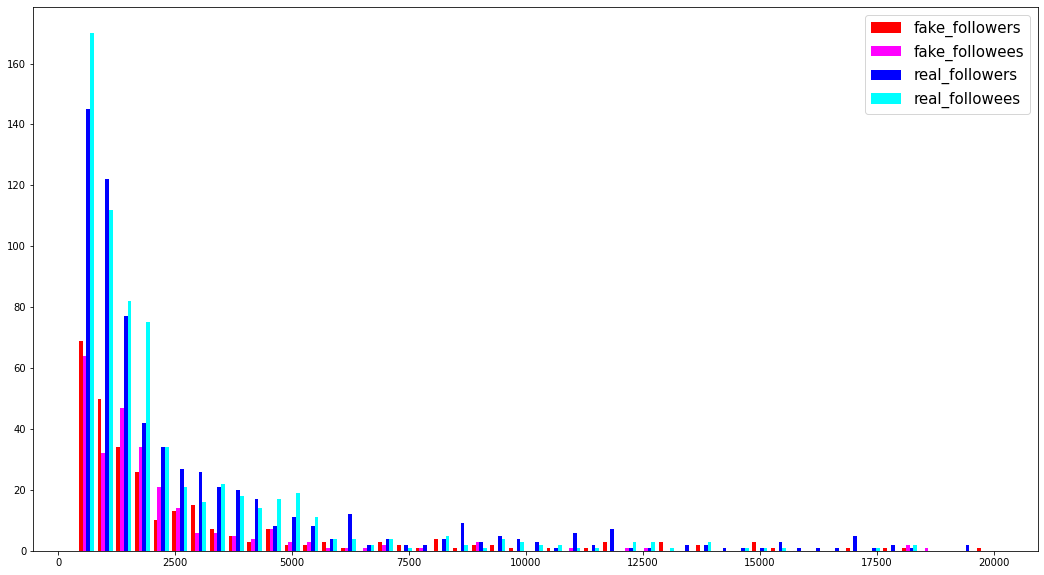

In [10]:
# Draw on the same plot the distribution of follower count for Fake and Real of HealthStory
# dataset. Repeat the process for the distribution of followee count for fake and Real data.

fake_followers = []
fake_followees = []
real_followers = []
real_followees = []
over_50k = 0

for i, j in enumerate(user_network_data):
    if list(user_network_data.values())[i].get("status") == "Fake":
        fake_followers.append(list(user_network_data.values())[i].get("user_followers"))
        fake_followees.append(list(user_network_data.values())[i].get("user_followees"))
    else:
        real_followers.append(list(user_network_data.values())[i].get("user_followers"))
        real_followees.append(list(user_network_data.values())[i].get("user_followees"))

bins=[]
start = 0
for k in range(50):
    h = 400
    value = start+h
    start=value
    bins.append(value)
colors = ["red", "magenta", "blue", "cyan"]
data = [fake_followers, fake_followees, real_followers, real_followees]
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(18)
ax.hist(data, bins=bins, color=colors, label=["fake_followers", "fake_followees", "real_followers", "real_followees"])
ax.legend(prop={'size': 15})
plt.show()



In [11]:

data = np.array(fake_followers)
results = powerlaw.Fit(data)
a = results.power_law.alpha
print(a)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')
print(R, p)

Calculating best minimal value for power law fit
1.6447456191451888
777.0
0.0005054707691085625 0.9814748317728136


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [12]:

#x = np.linspace(powerlaw.ppf(0.01, a), powerlaw.ppf(0.99, a), 100)
#ax.plot(x, powerlaw.pdf(x, a), 'r-', lw=5, alpha=0.6, label='powerlaw pdf')

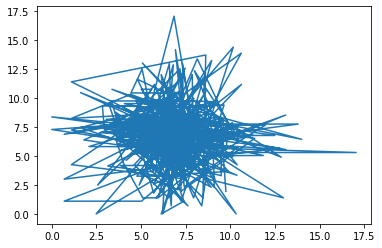

In [13]:
log_fake_followers = []
for i in fake_followers:
    if i != 0:
        log_fake_followers.append(math.log(i))
        
log_real_followers = []
j=len(log_fake_followers)
for i in real_followers:
    if i != 0:
        log_real_followers.append(math.log(i))
    if j == len(log_real_followers):
        break

fig, ax = plt.subplots(1, 1)
ax.plot(log_fake_followers, log_real_followers)

In [14]:
# parse the users to 500, because of the limitations of botometer 500/requests per day

#botometer_results_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\botometer_results.json'
#botometer_results1_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\botometer_results1.json'
#botometer_results_file = open(botometer_results_path, "w")
#botometer_results1_file = open(botometer_results1_path, "w")

#first_500 = {}

#count_fakes = 0
#count_reals = 0
#for i, j in enumerate(user_network_data):
    #status = list(user_network_data.values())[i].get("status")
    #if (status == "Fake") and (count_fakes < 250):
        #first_500[j] = list(user_network_data.values())[i]
        #count_fakes+=1
    #elif status == "Real" and (count_reals < 250):
        #first_500[j] = list(user_network_data.values())[i]
        #count_reals+=1


#rapidapi_key = "84c75f0daamsh171fa51b39ad2b5p11e8adjsn0b92f3f98b89"

#bom = botometer.Botometer(wait_on_ratelimit=True,
                          #rapidapi_key=rapidapi_key,
                          #**twitter_app_auth)

#botometer_results = {}

#for i,j in enumerate(first_500):
    #botometer_results[list(first_500.keys())[i]] = bom.check_account(list(user_network_data.values())[i].get("user_id"))

    

#jsonString = json.dumps(botometer_results)
#jsonString1 = json.dumps(botometer_results)

#botometer_results_file.write(jsonString)
#botometer_results1_file.write(jsonString1)

#botometer_results_file.close()
#botometer_results1_file.close()   


In [ ]:
botometer_results = {}

for i, j in enumerate(botometer_results_data):
    
# seuraavaksi pitää erotella botometer_resulst.json datasta "botit" ja "ei-botit" todennäköisyyksien perusteella
# ja siitä tehdä johtopäätöksiä, että onko "fake" uutisten jakajat yleensä botteja vai ei ja toisinpäin sama